In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2519,ham,Ok. I only ask abt e movie. U wan ktv oso?,NaN,NaN,NaN
4559,ham,I'm awake oh. What's up.,NaN,NaN,NaN
2598,ham,Okie... Thanx...,NaN,NaN,NaN
5081,ham,\HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VI...,DEVIOUSBITCH.ANYWAY,"IåÕL CALL U\""""",NaN
1592,ham,Will it help if we propose going back again to...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
#1. Data Cleaning
#2. EDA
#3. Text PreProcessing
#4. Model Building
#5. Evaluation
#6. Improvement, (websited and deploy)


## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.sample(5)

,v1,v2
122,spam,Todays Voda numbers ending 7548 are selected t...
2152,ham,Hi kindly give us back our documents which we ...
1150,ham,(That said can you text him one more time?)
4678,ham,Sry da..jst nw only i came to home..
455,ham,Si si. I think ill go make those oreo truffles.


In [12]:
# renaming the cols
df.rename(columns= {'v1':'target','v2':'text'}, inplace = True)
df.sample(5)

,target,text
4575,spam,Congratulations ur awarded 500 of CD vouchers ...
3339,ham,Like I made him throw up when we were smoking ...
938,spam,Urgent! call 09061749602 from Landline. Your c...
3147,ham,\CHEERS U TEX MECAUSE U WEREBORED! YEAH OKDEN ...
4087,ham,He needs to stop going to bed and make with th...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [18]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [20]:
df.shape

(5169, 2)

## 2. EDA

In [21]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

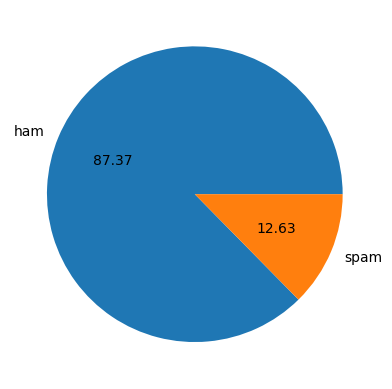

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [24]:
# Data is imbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kirankanyal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
df['num_characters']=df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
from nltk.tokenize import word_tokenize

In [30]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

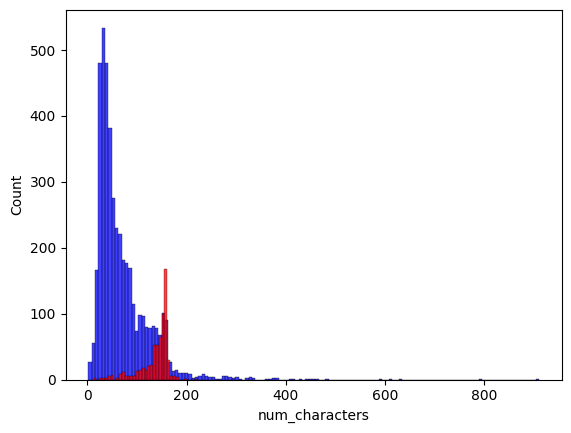

In [38]:

sns.histplot(df[df['target']==0]['num_characters'],color='blue')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

## 3. Data Preprocessing
Lower case  
Tokenization  
Removing special characters  
Removing stop words and punctuation  
Stemming

In [41]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [42]:
ps = PorterStemmer()

In [43]:
def transform_text(text):
    text = text.lower();
    text = nltk.word_tokenize(text)

    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
            

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

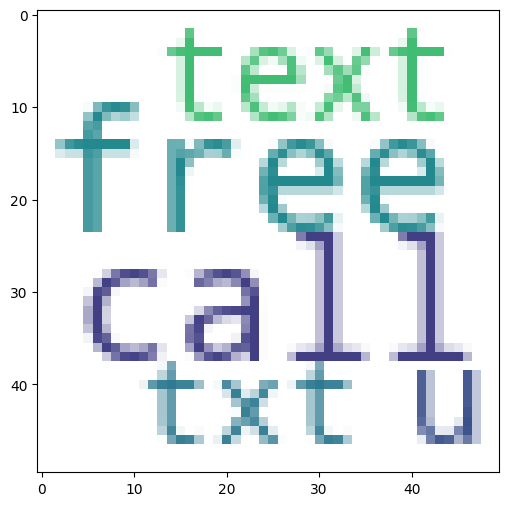

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

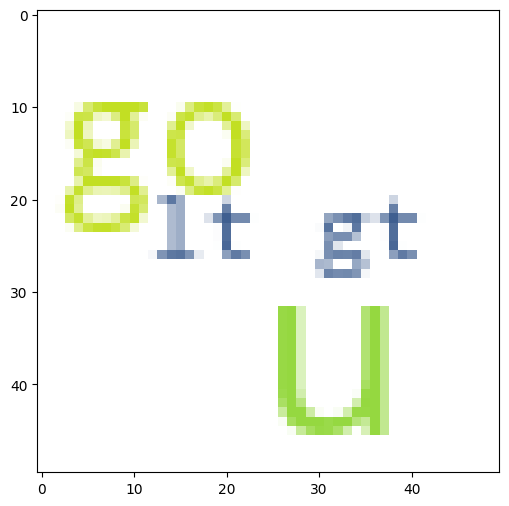

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

## 4. Model Building


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf = TfidfVectorizer()

In [53]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
X.shape

(5169, 6708)

In [55]:
y = df['target'].values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [59]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

In [60]:
mnb = MultinomialNB()

In [61]:
mnb.fit(X_train,Y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(precision_score(Y_test,y_pred))

0.9593810444874274
1.0


## Saving Model


In [68]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))